In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [115]:
data = pd.read_csv('./data/Final-Dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7528 entries, 0 to 7527
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         7528 non-null   int64 
 1   FORMATTED_CONTENT  7514 non-null   object
 2   CLASS              7528 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 176.6+ KB


In [116]:
data = data[['FORMATTED_CONTENT', 'CLASS']]
data.head()

,FORMATTED_CONTENT,CLASS
0,Huh anyway check out this you tube channel kob...,1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev com,1
3,me shaking my sexy ass on my channel enjoy,1
4,watch v vtaRGgvGtWQ Check this out,1


In [117]:
data[data['FORMATTED_CONTENT'].isna()]

,FORMATTED_CONTENT,CLASS
134,NaN,0
585,NaN,0
825,NaN,0
900,NaN,0
1220,NaN,0
1265,NaN,0
1386,NaN,0
1538,NaN,0
1821,NaN,0
1825,NaN,0


In [118]:
data.dropna(inplace=True)

In [119]:
data[data['FORMATTED_CONTENT'].isna()]

,FORMATTED_CONTENT,CLASS


In [120]:
data.groupby('CLASS').describe().T

CLASS                                         0  \
FORMATTED_CONTENT count                    5763   
                  unique                   5378   
                  top     Sorry I ll call later   
                  freq                       30   

CLASS                                                   1  
FORMATTED_CONTENT count                              1751  
                  unique                             1407  
                  top     Check out this video on YouTube  
                  freq                                101

In [121]:
count_vect = CountVectorizer(stop_words='english')
tfidf_transformer = TfidfTransformer()

In [110]:
train_content_counts = count_vect.fit_transform(data['FORMATTED_CONTENT'])
train_content_counts
train_content_tfidf = tfidf_transformer.fit_transform(train_content_counts)
train_content_tfidf

<7514x9876 sparse matrix of type '<class 'numpy.float64'>'
	with 56728 stored elements in Compressed Sparse Row format>

In [111]:
train_content, test_content, train_class, test_class = train_test_split(train_content_tfidf, data['CLASS'],test_size=0.2,random_state=45)

In [112]:
train_content, test_content

(<6011x9876 sparse matrix of type '<class 'numpy.float64'>'
 	with 45102 stored elements in Compressed Sparse Row format>,
 <1503x9876 sparse matrix of type '<class 'numpy.float64'>'
 	with 11626 stored elements in Compressed Sparse Row format>)

In [122]:
train_content, test_content, train_class, test_class = train_test_split(data['FORMATTED_CONTENT'],data['CLASS'],test_size=0.2,random_state=45)

In [123]:
count_vect = CountVectorizer(stop_words='english')
tfidf_transformer = TfidfTransformer()

In [124]:
train_content_counts = count_vect.fit_transform(train_content)
train_content_counts
train_content_tfidf = tfidf_transformer.fit_transform(train_content_counts)
train_content_tfidf

<6011x8633 sparse matrix of type '<class 'numpy.float64'>'
	with 45102 stored elements in Compressed Sparse Row format>

In [125]:
test_content_counts = count_vect.transform(test_content)
test_content_counts
test_content_tfidf = tfidf_transformer.transform(test_content_counts)
test_content_tfidf

<1503x8633 sparse matrix of type '<class 'numpy.float64'>'
	with 10299 stored elements in Compressed Sparse Row format>

In [113]:
model = LogisticRegression()
model.fit(test_content,train_class)

ValueError: Found input variables with inconsistent numbers of samples: [1503, 6011]

In [126]:
model = LogisticRegression()
model.fit(train_content_tfidf,train_class)

LogisticRegression()

In [127]:
predictions = model.predict(test_content_tfidf)

In [128]:
accuracy_score(test_class, predictions)

0.9527611443779108

In [129]:
print(classification_report(test_class, predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1177
           1       0.97      0.80      0.88       326

    accuracy                           0.95      1503
   macro avg       0.96      0.90      0.93      1503
weighted avg       0.95      0.95      0.95      1503



<AxesSubplot:>

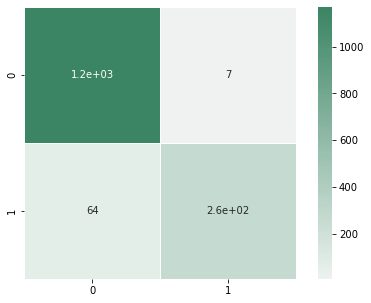

In [130]:
c_matrix = confusion_matrix(test_class, predictions)

f, ax = plt.subplots(figsize = (8, 5))
c_map = sns.diverging_palette(220, 150, as_cmap = True)
sns.heatmap(c_matrix, center = 0, cmap=c_map, annot= True, square = True, linewidths= 0.5)

In [131]:
model2 = LogisticRegression(C = 2.0, max_iter = 200)
model2.fit(train_content_tfidf,train_class)
predictions2 = model2.predict(test_content_tfidf)
accuracy_score(test_class, predictions2)

0.9620758483033932

In [132]:
print(classification_report(test_class,predictions2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1177
           1       0.98      0.84      0.91       326

    accuracy                           0.96      1503
   macro avg       0.97      0.92      0.94      1503
weighted avg       0.96      0.96      0.96      1503



<AxesSubplot:>

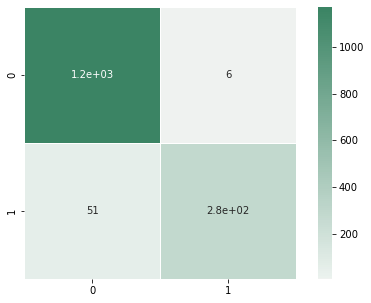

In [133]:
c_matrix2 = confusion_matrix(test_class, predictions2)

f, ax = plt.subplots(figsize = (8, 5))
c_map2 = sns.diverging_palette(220, 150, as_cmap = True)
sns.heatmap(c_matrix2, center = 0, cmap=c_map2, annot= True, square = True, linewidths= 0.5)

In [134]:
model3 = SVC()
model3.fit(train_content_tfidf,train_class)
predictions3 = model3.predict(test_content_tfidf)
accuracy_score(test_class, predictions3)

0.9707252162341983

In [135]:
print(classification_report(test_class,predictions3))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1177
           1       0.98      0.88      0.93       326

    accuracy                           0.97      1503
   macro avg       0.97      0.94      0.96      1503
weighted avg       0.97      0.97      0.97      1503



<AxesSubplot:>

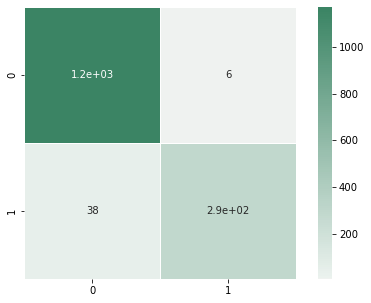

In [136]:
c_matrix3 = confusion_matrix(test_class, predictions3)

f, ax = plt.subplots(figsize = (8, 5))
c_map3 = sns.diverging_palette(220, 150, as_cmap = True)
sns.heatmap(c_matrix3, center = 0, cmap=c_map3, annot= True, square = True, linewidths= 0.5)

In [137]:
model4 = SVC(kernel='linear')
model4.fit(train_content_tfidf,train_class)
predictions4 = model4.predict(test_content_tfidf)
accuracy_score(test_class, predictions4)

0.9740518962075848

In [138]:
print(classification_report(test_class,predictions4))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1177
           1       0.96      0.92      0.94       326

    accuracy                           0.97      1503
   macro avg       0.97      0.95      0.96      1503
weighted avg       0.97      0.97      0.97      1503



<AxesSubplot:>

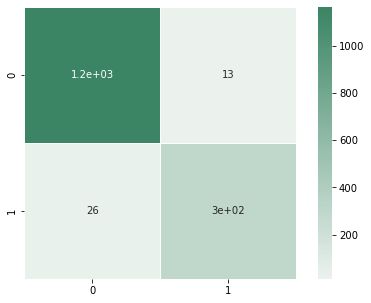

In [139]:
c_matrix4 = confusion_matrix(test_class, predictions4)

f, ax = plt.subplots(figsize = (8, 5))
c_map4 = sns.diverging_palette(220, 150, as_cmap = True)
sns.heatmap(c_matrix4, center = 0, cmap=c_map4, annot= True, square = True, linewidths= 0.5)

In [105]:
new_test_content = pd.Series(['Happy Birthday Jane Many returs of the day', 'Check out my video here to earn quick money xxxx'])
new_test_content

0          Happy Birthday Jane Many returs of the day
1    Check out my video here to earn quick money xxxx
dtype: object

In [140]:
new_test_counts = count_vect.transform(['Happy Birthday Jane Many returs of the day', 'Check out my video here to earn quick money xxxx'])
new_test_tfidf = tfidf_transformer.transform(new_test_counts)
new_test_tfidf

<2x8633 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [141]:
predictions_new = model.predict(new_test_tfidf)
predictions_new

array([0, 1], dtype=int64)

In [142]:
predictions_new_1 = model2.predict(new_test_tfidf)
predictions_new_1

array([0, 1], dtype=int64)

In [143]:
predictions_new_4 = model4.predict(new_test_tfidf)
predictions_new_4

array([0, 1], dtype=int64)

In [144]:
from joblib import dump, load

In [145]:
dump(count_vect, './model/vectorizer.joblib')

['./model/vectorizer.joblib']

In [146]:
dump(tfidf_transformer, './model/tfidf.joblib')

['./model/tfidf.joblib']

In [147]:
dump(model4, './model/svm_linear.joblib')

['./model/svm_linear.joblib']